In [13]:
library(ggplot2)
library(igraph)
library(tidyverse)
library(reshape2)

In [14]:
year <- read.csv("year1_logret.csv", header=T)

year <- year %>% remove_rownames %>% column_to_rownames(var="X")
year

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,⋯,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,0,0,0,1,0,0,0,1,1,0,⋯,0,1,1,1,1,0,1,0,0,0
AAL,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAP,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAPL,1,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,1,0,0,0,0,0
ABBV,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABC,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABT,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
ACN,1,0,0,0,0,0,0,0,1,0,⋯,0,1,0,0,1,0,0,0,0,0
ADBE,1,0,0,1,0,0,0,1,0,0,⋯,0,1,1,0,1,0,1,0,0,0
ADI,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
year[year[,] == 0] <- NA
year <- as.matrix(year)
year

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,⋯,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
A,NA,NA,NA,1,NA,NA,NA,1,1,NA,⋯,NA,1,1,1,1,NA,1,NA,NA,NA
AAL,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAP,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAPL,1,NA,NA,NA,NA,NA,NA,NA,1,NA,⋯,NA,NA,NA,NA,1,NA,NA,NA,NA,NA
ABBV,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABC,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABT,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,1,NA,NA,NA,NA,NA,NA
ACN,1,NA,NA,NA,NA,NA,NA,NA,1,NA,⋯,NA,1,NA,NA,1,NA,NA,NA,NA,NA
ADBE,1,NA,NA,1,NA,NA,NA,1,NA,NA,⋯,NA,1,1,NA,1,NA,1,NA,NA,NA
ADI,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [16]:
#use melt to reshape the matrix into triplets, na.omit to get rid of the NA rows
upperTriangle <- upper.tri(year, diag=F) #turn into a upper triangle
links.upperTriangle <- year #take a copy of the original corr-mat
links.upperTriangle[!upperTriangle] <- NA
links.upperTriangle[year] <- NA#set everything not in upper triangle to NA
links_filtered <- na.omit(melt(links.upperTriangle)) #use melt to reshape the matrix into triplets, na.omit to get rid of the NA rows
colnames(links_filtered)<-c("stock1", "stock2", "value")
links_filtered <- as.matrix(links_filtered)
links_filtered
dim(links_filtered)

,stock1,stock2,value
1501,A,AAPL,1
3006,ABC,ABT,1
3501,A,ACN,1
4001,A,ADBE,1
4004,AAPL,ADBE,1
4008,ACN,ADBE,1
5001,A,ADM,1
5501,A,ADP,1
5503,AAP,ADP,1
5506,ABC,ADP,1


[1] 22603     3

In [17]:
#g <- graph_from_adjacency_matrix(links, weighted=T, mode="undirected", diag=F)
g <- graph_from_edgelist(links_filtered[,1:2], directed=F)

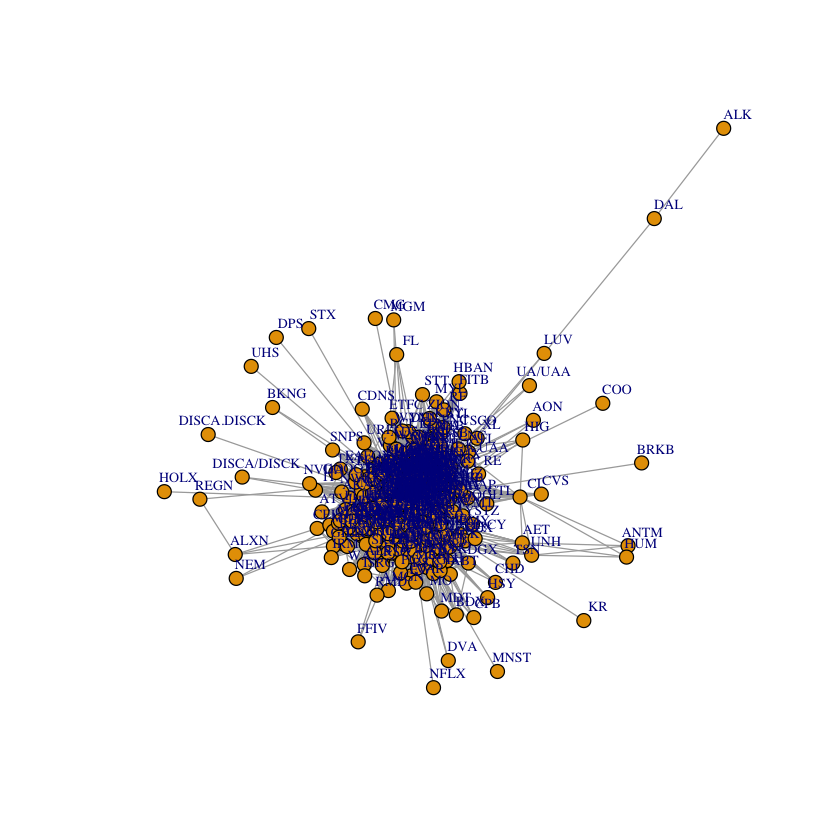

In [18]:
# Visualize network
plot.igraph(g, vertex.size=5, vertex.label.cex=0.7, vertex.label.dist=1)

In [19]:
# Save network graph as ong file
png(filename="R_year1_graph.png", width=1000, height=800)
plot.igraph(g, vertex.size=5, vertex.label.cex=0.7, vertex.label.dist=1)
dev.off()

pdf 
  2

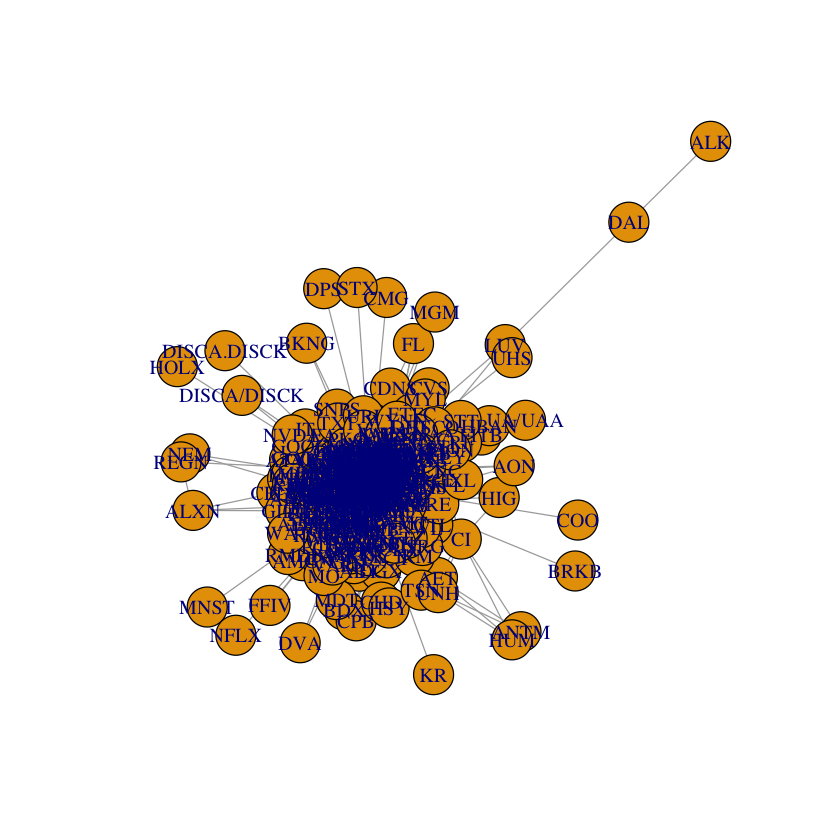

In [20]:
set.seed(4321)
layout = layout.fruchterman.reingold(g, niter=10000)
plot(g, layout=layout)

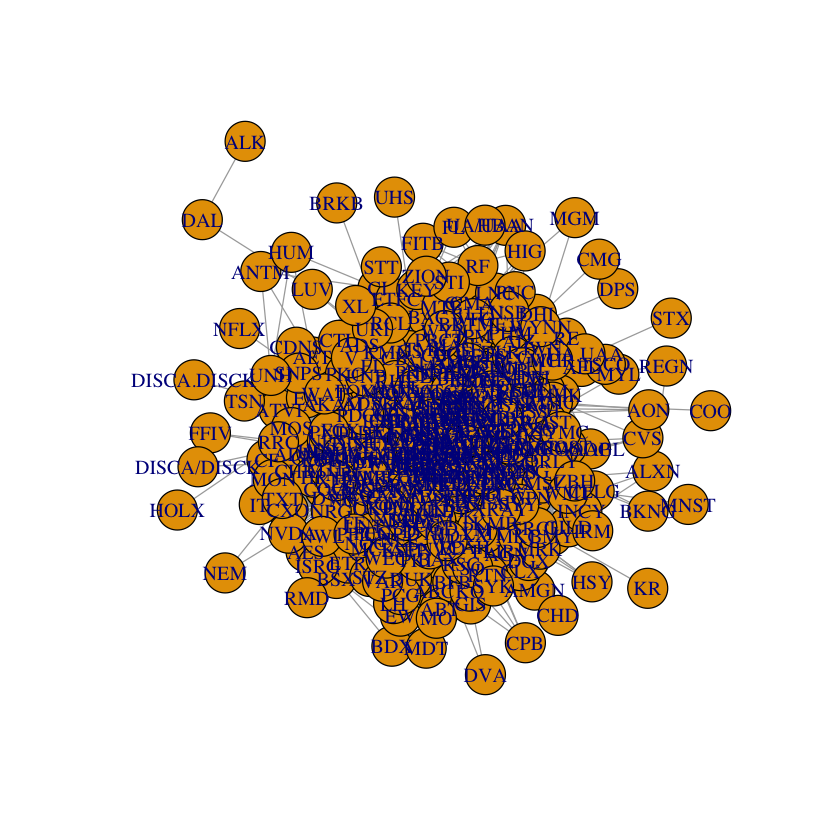

In [21]:
set.seed(1234)
layout = layout_with_lgl
plot(g, layout=layout)

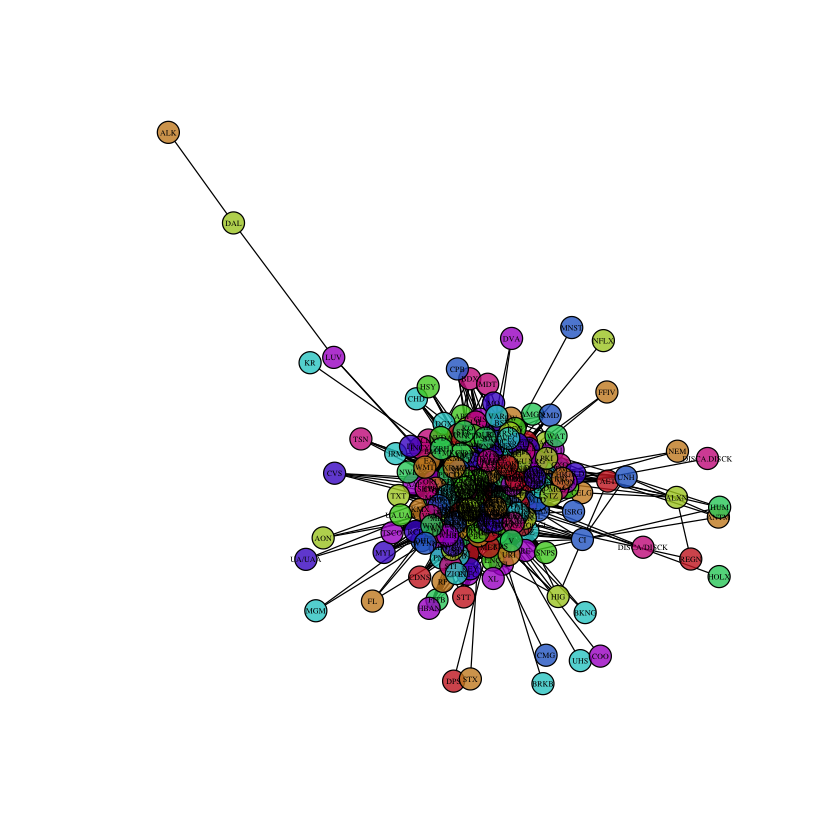

In [22]:
# Visualize colorful network
plot(g, vertex.size=8, vertex.color = rainbow(10, .8, .8, alpha= .8),
vertex.label.color = "black", vertex.label.cex = 0.4, vertex.label.degree = -pi/2,
edge.arrow.size = 0.3, edge.arrow.width = 0.4, edge.color = "black")